#  TITANIC DATASET ANALYSIS

##### Importing required libraries

In [458]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')
# ---
#Importing the required libraries
import pandas as pd
import numpy as np
pd.options.display.max_columns = 100
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline
pd.options.display.max_rows = 100

Populating the interactive namespace from numpy and matplotlib


## DATA ACQUISITION

In [459]:
titanic_data = pd.read_csv(r'C:\Users\Deepa\Downloads\titanic-data.csv')# Importing the data frame


In [460]:
# Checking if the data has been loaded and taking a peek at the dataframe.
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [461]:
titanic_data.tail()# printing the last 5 records of the dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


__Data Description__

(from https://www.kaggle.com/c/titanic)

-  survived: Survival (0 = Dead; 1 = Survived)
-  pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
-  name: Name
-  sex: Sex
-  age: Age
-  sibsp: Number of Siblings/Spouses Aboard
-  parch: Number of Parents/Children Aboard
-  ticket: Ticket Number
-  fare: Passenger Fare
-  cabin: Cabin
-  embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

_Special Notes:_

Pclass is a proxy for socio-economic status (SES) 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1) If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch) some relations were ignored. The following are the definitions used for sibsp and parch.
Sibling: Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse: Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent: Mother or Father of Passenger Aboard Titanic
Child: Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

 

### Questions that will be analysed :

*  Q1. Did the crew abide by the common rule, "Women and Children first" while giving access to life boats of the sinking ship?
*  Q2. Did the First Class passengers use their socio-economical influence in getting access to the life boats prior to passengers of other classes
*  Q3. Which class of people travelled and who survived from each region of Embarkment?

### DATA CLEANING (and modifications as necessary)

#### 1. Checking for duplicate rows, for duplicate data may alter the accuracy of the results

In [462]:
# Identify and remove duplicate entries
titanic_data_duplicate_entry = titanic_data.duplicated()
print ('Number of duplicate entries are {}'.format(titanic_data_duplicate_entry.sum()))

Number of duplicate entries are 0


So, there are not any duplicate values in the dataframe.

In [463]:
""" The Following built-in function results in a table with values for Mean, Minimum value, Maximum value, 
etc for all numerical variables in the data frame """
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The following interpretations can be made looking at the above data.
-  The mean age of the passengers travelling was 29.7 with minimum age 0.42 and maximum age 80 years.
-  38% of the passengers survived.
-  More than 50% of the Passengers in the dataframe are 3rd class passengers.
-  The fare seems to have values with 0 indicating possibility of some free tickets!! (Error or free tickets given to some esteemed Crew members or Influencial people)
On the other hand, 512 is a possible outlier.
-  75% of the Fare prices were closer to the Average fare, making the upper class passengers lesser in number.


#### 2. Removing columns that are not used in this analysis

In [464]:
# Create new dataset with only required column names for this analysis
titanic_data_new = titanic_data.drop(['Name','Ticket','Cabin','Fare','SibSp','Parch'], axis=1)
titanic_data_new.head()# Displays the first 5 rows of the dataframe

,PassengerId,Survived,Pclass,Sex,Age,Embarked
0,1,0,3,male,22.0,S
1,2,1,1,female,38.0,C
2,3,1,3,female,26.0,S
3,4,1,1,female,35.0,S
4,5,0,3,male,35.0,S


#### 3. Populating the missing values for more accurate analysis

In [465]:
"""This built-in function gives the information of the dataframe.  Total number of columns and total count of all the values 
for each column and their data types"""
titanic_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
Embarked       889 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 41.8+ KB


-  There are about 177 passengers with out their Age entered in the dataset. Dropping these passengers might not be favourable for the analysis as it is almost 20% of the data.
So, let us take the median of the Ages across the passengers to fill up the blanks. (Median value is more robust to outliers than the Mean value.)
-  There are two passengers with out their port of Embarkment. I shall remove these records later in the Analysis.  

In [466]:
titanic_data_new['Age'].median()# Usage of bult-in function that results in the Median of the Values for the variable,'Age'

28.0

In [467]:
titanic_data_new.describe()

,PassengerId,Survived,Pclass,Age
count,891.000000,891.000000,891.000000,714.000000
mean,446.000000,0.383838,2.308642,29.699118
std,257.353842,0.486592,0.836071,14.526497
min,1.000000,0.000000,1.000000,0.420000
25%,223.500000,0.000000,2.000000,20.125000
50%,446.000000,0.000000,3.000000,28.000000
75%,668.500000,1.000000,3.000000,38.000000
max,891.000000,1.000000,3.000000,80.000000


Notice that Mean is greater than the Median, which makes this Normal Distribution right skewed as we would see in our Visualization section.

In [468]:
# Fills the Median value, 28 in all the rows that have Null values in the column, Age
titanic_data_new['Age'].fillna(titanic_data_new['Age'].median(), inplace=True)

In [469]:
titanic_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
Embarked       889 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 41.8+ KB


Now, we have filled in all the NULL values for the Age with Median age, which helps in our analysis rather than losing nearly 20% of the data.


For understanding and reading the code, let us update the Embarkment stations to their actual names instead of representing them in their abbreviated letters.
Let us start by checking if there are any other values other than the described 3 stations, C = Cherbourg; Q = Queenstown; S = Southampton

In [470]:
def check_col_values(col): 
    """Confirming if there are any unexpected Unique values.  
    The method, unique() will check if the 'col' variable passed to the function 'check_col_values' has any value other than
    S,C or Q.
    This value is stored in 'col' which will be passed to the 'Embarked' column of our dataframe when the function is called.
    It results in S, C, Q and nan.  nan is the null value or the missing data for that column"""
    return titanic_data_new[col].unique() 
check_col_values("Embarked") # confirms only Q, S, C in dataset

array(['S', 'C', 'Q', nan], dtype=object)

We found nothing. So, let us update.

In [471]:
def update_port_name(port):
    """This function updates the Full names of the ports replacing the letters representing them.
    If-Else condition is used to make decissions of what need to be updated based on the result of the condition given."""
    if port == "C":
        return "Cherbourg"
    elif port == "Q":
        return "Queenstown"
    elif port == "S":
        return "Southhampton"
    else:
        return port
        
titanic_data_new["Embarked"] = titanic_data_new["Embarked"].apply(update_port_name)
titanic_data_new.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked
0,1,0,3,male,22.0,Southhampton
1,2,1,1,female,38.0,Cherbourg
2,3,1,3,female,26.0,Southhampton
3,4,1,1,female,35.0,Southhampton
4,5,0,3,male,35.0,Southhampton


### EXPLORATION and VISUALIZATION

#### Q1. Did the crew abide by the common rule, "Women and Children first" while giving access to life boats in the sinking ship?

#### In this section we will consider the following factors for our analysis, that we assume might have affected the survival ratio:
*  1) Sex, using numpy we will check for value,'female' to determine if women were given priority to access life boats
*  2) Age, we will code to figure out the number of children, and see if children were able to get access to the life boats prior to men. 

#### Exploring data with the variable, 'Survived' 

In [472]:
"""In the below code, the variable, 'people_to_survive' is printed with the sum of all the counts for Boolean Value '1' 
for column'Survived' along each row of the dataframe, 'titanic_data_new'.
Use of the built-in method, Sum() here to take the count.  
The format() method is used to print the result as an integer.  """

people_to_survive = titanic_data_new[titanic_data_new['Survived'] == True]['Survived'].sum()
print ('The TOTAL number of people who survived: {}'.format(people_to_survive))

The TOTAL number of people who survived: 342


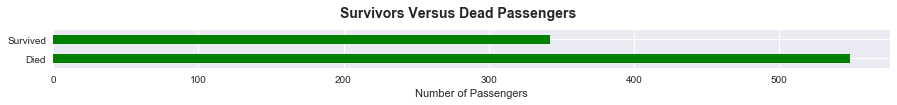

In [473]:
def Survival_rate(num):
    """Using If-Else condition, the function returns a value Died for the input 0 and Survived for the input 1.
    num is the variable used for input and returning the values."""
    if num == 0:
        return "Died"
    elif num == 1:
        return "Survived"

fig = plt.figure()# To plot
fig.suptitle('Survivors Versus Dead Passengers',fontsize=14, fontweight='bold')# Printing the title for the plot

ax = fig.add_subplot(111)#to adjust the allignment/margin of the title
fig.subplots_adjust(top=0.65)


num_survived = titanic_data_new["Survived"].apply(Survival_rate).value_counts()# Use of function, Survival_rate

""" The function is called for every row of the dataframe, titanic_data_new and checked for Column, Survived.
The proxy for this column in our function is input variable, num.  
The built-in method, value_counts is applied to the result of the Survival_rate function to get a total of all the Dead 
and Survived values.  """

num_survived.plot(kind="barh", figsize=(15, 1), color="green").set_xlabel("Number of Passengers")

The above plot represents the same. So we conclude that there were only about 38.38% of survivors!!

#### Exploring the data with variable, 'Sex' 

Now, let us see the survival ratio of male and female regardless of age. Let us represent this in a plot to visualize this data.

Number of survivors:
 female    233
male      109
Name: Sex, dtype: int64

Number of dead:
 male      468
female     81
Name: Sex, dtype: int64


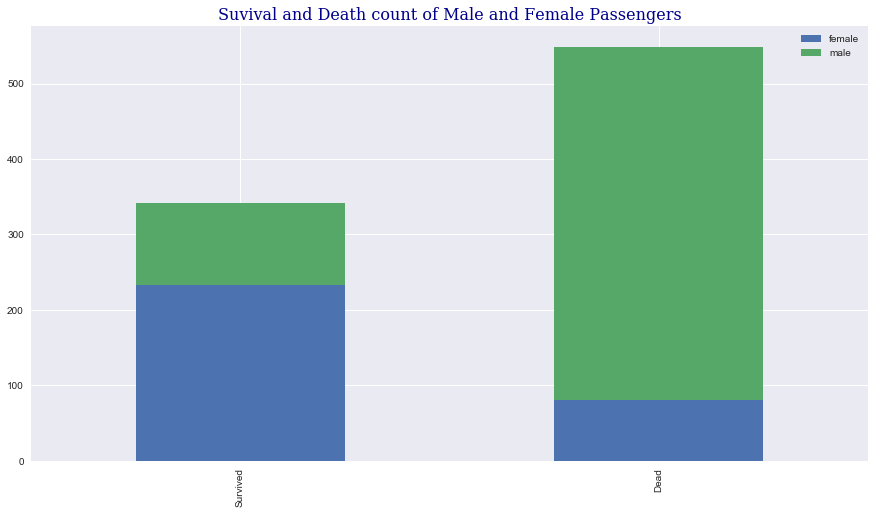

In [474]:
survived_sex = titanic_data_new[titanic_data_new['Survived']==1]['Sex'].value_counts()#to get the survived total for each sex
dead_sex = titanic_data_new[titanic_data_new['Survived']==0]['Sex'].value_counts()#to get the dead total for each sex

print ('Number of survivors:\n',survived_sex)
print ()# to get a line space
print ('Number of dead:\n',dead_sex)

font = {'family': 'serif',
        'color':  'darkblue',
        'weight': 'normal',
        'size': 16,
        }# function to define the font used for displaying the Title of the Figure

df = pd.DataFrame([survived_sex,dead_sex])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(15,8))

plt.title("Suvival and Death count of Male and Female Passengers",fontdict=font)

So, we see that the plot represents that more than 70% of the dead were male. So we can conclude that being women or females increased the chances of survival!! 

#### Exploring data with variable, 'Age'

Now, let us see the distribution of Age among the passengers:

Assumptions:
-  We will have to make an assumption that the children are below the age of 12 years.
-  We have filled the Median Value of the Ages from our data, i.e.,28 years for the missing values in column Age.


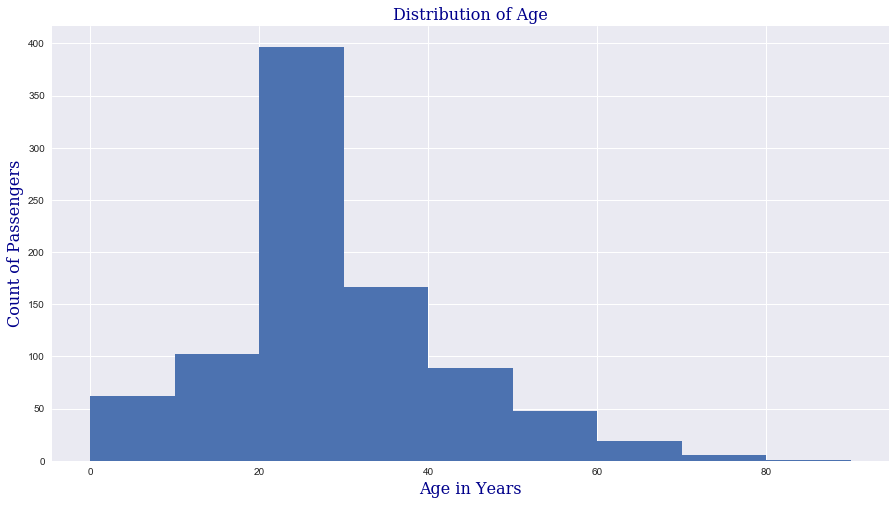

In [475]:
titanic_data_new["Age"].plot.hist(title="Distribution of Age", bins=range(0, 100, 10), figsize=(15,8)).set_xlabel("Age in Years",fontdict=font)
plt.ylabel('Count of Passengers',fontdict=font)
plt.title('Distribution of Age',fontdict=font)

From the above visualization, which is a normal distribution, we know that most of the passengers were between the age 20 and 40 years. Also, the calculations below shows that the mean or the average age of the passengers is 29.36 years.

In [476]:
titanic_data_new.describe()

,PassengerId,Survived,Pclass,Age
count,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582
std,257.353842,0.486592,0.836071,13.019697
min,1.000000,0.000000,1.000000,0.420000
25%,223.500000,0.000000,2.000000,22.000000
50%,446.000000,0.000000,3.000000,28.000000
75%,668.500000,1.000000,3.000000,35.000000
max,891.000000,1.000000,3.000000,80.000000


Other interesting factors we discover from the above distribution:
The youngest passenger is of age, 0.42 (infant of 4 months) and the oldest passenger's age is 80 years.

Now, let us consider visualizing the survived passengers versus the dead on the Age distribution.

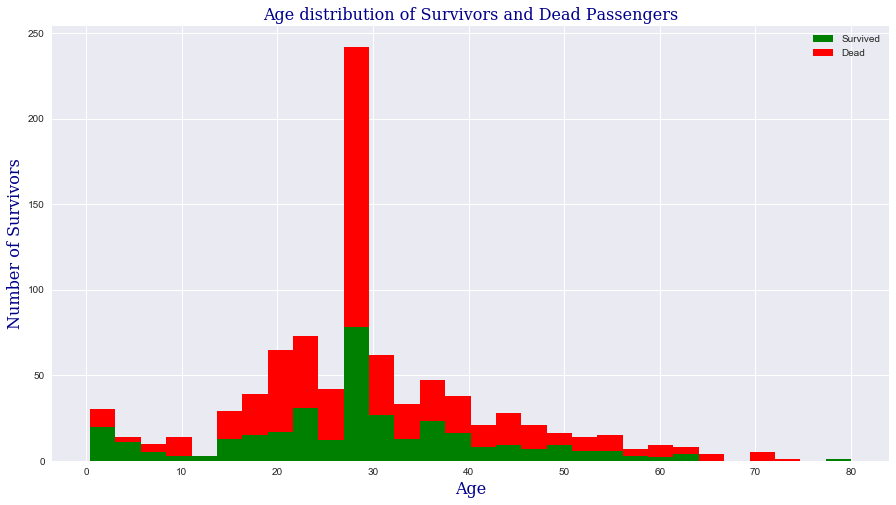

In [477]:
figure = plt.figure(figsize=(15,8))
plt.hist([titanic_data_new[titanic_data_new['Survived']==1]['Age'], titanic_data_new[titanic_data_new['Survived']==0]['Age']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Survived','Dead'])
plt.xlabel('Age',fontdict=font)
plt.ylabel('Number of Survivors',fontdict=font)
plt.title('Age distribution of Survivors and Dead Passengers',fontdict=font)
plt.legend()

In [478]:
#Separating children and adults
children_onboard = titanic_data_new[titanic_data_new['Age'] < 12]['Age'].value_counts().sum()
"""In the above calculation, the variable, 'children_onboard' stores the sum of the values for the Column, 'Age' that are less than 12. """

print ('The total number of children on board: {}'.format(children_onboard))# format() used to print value as a whole number

Adults_onboard = titanic_data_new[titanic_data_new['Age'] > 12]['Age'].value_counts().sum()
"""In the above calculation, the variable, 'Adults_onboard' stores the sum of the values for the Column, 'Age' that are greater than 12. """

print ('The total number of adults on board: {}'.format(Adults_onboard))# format() used to print value as a whole number

The total number of children on board: 68
The total number of adults on board: 822


If we separate the children from the rest of the passengers to get the count of surviving children versus surviving adults.

Agegroup  Survived
Adult     0           520
          1           302
Child     0            29
          1            39
dtype: int64


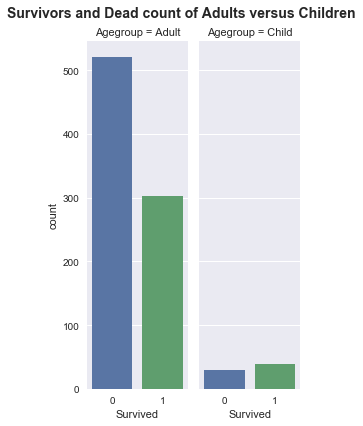

In [479]:
"""Using aliases to represent the data separated as child and adult by creating a new column Agegroup in the original dataframe"""

titanic_data_new.loc[(titanic_data_new['Age'] < 12), 'Agegroup'] = 'Child'
titanic_data_new.loc[(titanic_data_new['Age'] > 12), 'Agegroup'] = 'Adult'

print (titanic_data_new.groupby(['Agegroup','Survived']).size())#usage of groupby() to print the data and the total in each classification

g = sns.factorplot('Survived', col='Agegroup', data=titanic_data_new, kind='count', size=6, aspect=.3)

g.fig.subplots_adjust(top=0.9)

g.fig.suptitle('Survivors and Dead count of Adults versus Children',fontsize=14, fontweight='bold')

From the above comparison, although the number of child passengers are lesser compared to the number of adult passengers, the survival rate is more for children than the survival rate for adults. 

39 out of 68 children survived where as only 302 out of 822 adults survived.

So yes, the answer for our first question is clear that more women and children survived for sure.

#### Q2. Did the First Class passengers use their socio-economical influence in getting access to the life boats prior to passengers of other classes

#### Exploring data with variable, 'Pclass' 

Let us first visualize a graph of the distribution of all the passengers across Paseenger Classes.

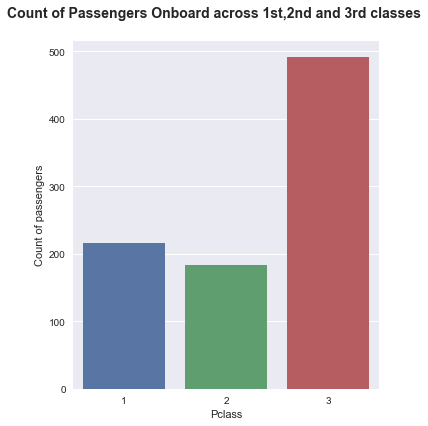

In [480]:
# To plot the passengers onboard across each Passenger Class (Pclass) by count on Y-axis

g = sns.factorplot('Pclass', data=titanic_data_new, kind='count',size=6, aspect=.8)
g.set_ylabels("Count of passengers")

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Count of Passengers Onboard across 1st,2nd and 3rd classes',fontsize=14, fontweight='bold')
g.add_legend();

And the below calculations give us the data of the Survivors in each of these Passenger Classes:

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64


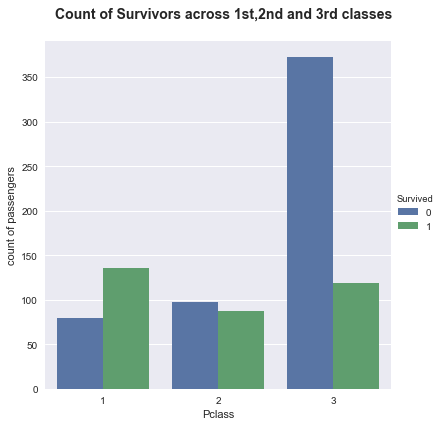

In [481]:
Passengers_Class = titanic_data_new['Pclass'].value_counts()# getting count for each Pclass values, 1,2 and 3
print (titanic_data_new.groupby(['Pclass','Survived']).size())#Printing the passengers grouped by their Pclass and the total count in each class.

g= sns.factorplot('Pclass',order=[1,2,3], data=titanic_data_new, hue='Survived',kind='count',size=6, aspect=.9)
g.despine(left=True)
g.set_ylabels("count of passengers")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Count of Survivors across 1st,2nd and 3rd classes',fontsize=14, fontweight='bold')

From the above two visualizations we can say that, although there were more number of passengers travelling in the Lower class (Pclass 3) the maximum number of survivors were from the Upper class (Pclass 1)

Let us now finally take a look at the data to see if women, children and the upper class had a better chance of survival, which is the goal of our first question in this analysis.

For this, we will first consider the distribution of passengers across classes. We will have to separate the passengers into Children or adults and adults into men and women. We will categorise children into one group regardless of their gender.

The below function will add a separate column, 'Age_group' into the dataframe, thus keeping the original dataframe unaltered.
This column will hold the values: 'Men' or 'Women' if the return value is more than 12 and 'Child' if the return value is less than 12 years of age.

In [482]:
def Passenger_Category(passenger):
    """The function will first check the value of Age, if it finds the value to be less than 12 
    then return value of the passenger variable will be updated to child, else, the passenger variable will return the 
    value of the Sex, as male or female."""
    
    age, sex = passenger

    if age < 12:
        return 'child'
    else:
        return sex

"""A new column, 'Age_group' is created in the dataframe, titanic_data_new and updated with the return values of the above function. """

titanic_data_new['Age_group'] = titanic_data_new[['Age', 'Sex']].apply(Passenger_Category, axis=1) #This creates a new column

In [483]:
print (titanic_data_new.groupby(['Pclass','Age_group']).size())

Pclass  Age_group
1       child          4
        female        93
        male         119
2       child         17
        female        68
        male          99
3       child         47
        female       121
        male         323
dtype: int64


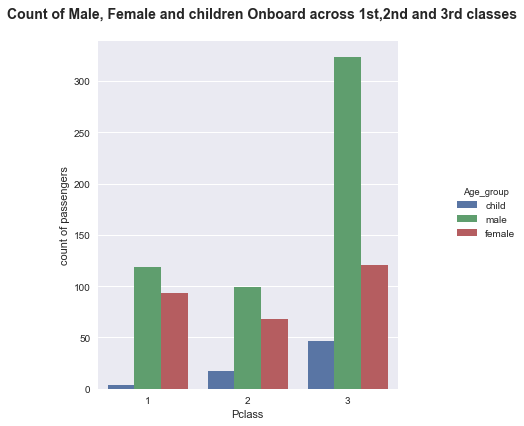

In [484]:
#Visualizing the count of male, female and children in classes, 1, 2 and 3 
g= sns.factorplot('Pclass', order=[1,2,3], data=titanic_data_new, hue='Age_group', kind='count',size=6, aspect=.8,hue_order=['child','male','female'])
g.despine(left=True)
g.set_ylabels("count of passengers")

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Count of Male, Female and children Onboard across 1st,2nd and 3rd classes',fontsize=14, fontweight='bold')

Now let us introduce the 'Survived' variable and have a visualization of survivors in each category of passengers across each class.

We will now have a subset of data with only survived passengers.

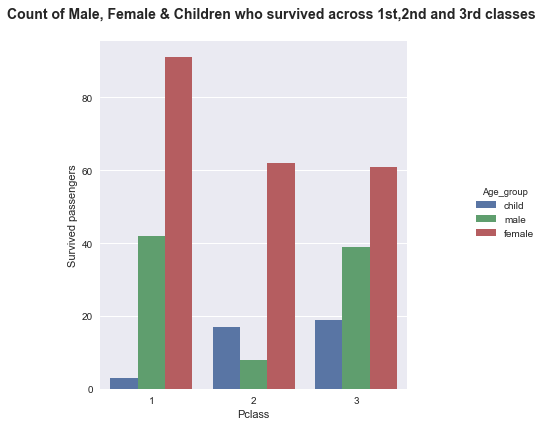

In [485]:
#Visualising the count of surviving male, female and children in class 1, 2 and 3
Survival_data = (titanic_data_new[titanic_data_new["Survived"]==1])

Survival_data['Age_group'] = Survival_data[['Age', 'Sex']].apply(Passenger_Category, axis=1) #use of previously written function

g= sns.factorplot('Pclass', order=[1,2,3], data=Survival_data, hue='Age_group', kind='count',size=6, aspect=.8,hue_order=['child','male','female'])
g.despine(left=True)
g.set_ylabels("Survived passengers")

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Count of Male, Female & Children who survived across 1st,2nd and 3rd classes',fontsize=14, fontweight='bold')

In [486]:
print (Survival_data.groupby(['Pclass','Age_group']).size())# Printing the survivors in groupd of male, female and children in 3 classes

Pclass  Age_group
1       child         3
        female       91
        male         42
2       child        17
        female       62
        male          8
3       child        19
        female       61
        male         39
dtype: int64


If we determine the proportion of survivors in each age group across the passenger classes, we can come to a conclusion on our question if there were more survivors in the first class than other two classes and if women and children had better chance of survival.

Pclass  Age_group
1       child        0.75
        female       0.98
        male         0.35
2       child         1.0
        female       0.91
        male         0.08
3       child         0.4
        female        0.5
        male         0.12
dtype: object


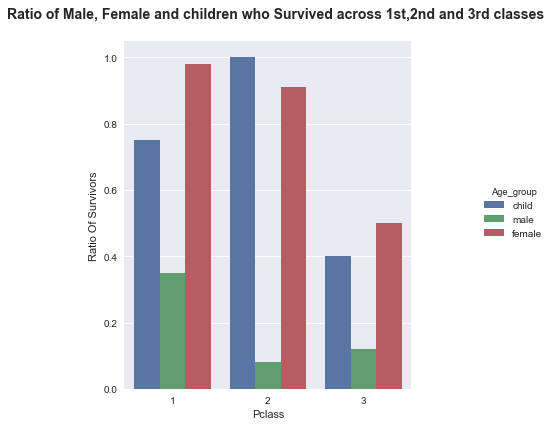

In [487]:
#Calculating and plotting the 'proportion' of survivors to total passengers grouping them by male, female and children and by classes 1,2 and 3

Total_Passengers = (titanic_data_new.groupby(['Pclass','Age_group']).size())
Survivors = (Survival_data.groupby(['Pclass','Age_group']).size())

Survival_ratio = (Survivors/Total_Passengers).apply(lambda x: str(round(x, 2)))# Rounding the floating result to 2 decimal place

print (Survival_ratio)

Survival_ratio = Survival_ratio.reset_index()# Resetting the index as we grouped the data in previous step for calculating ratio.
Survival_ratio.columns = ['Pclass', 'Age_group', 'SRatio']#creating new dataset

Survival_ratio = Survival_ratio.apply(pd.to_numeric, errors='ignore')
"""to_numeric to convert the argument to a numeric value and invalid parsing will return the input when error is set to ignore"""

g= sns.factorplot('Pclass', 'SRatio',data=Survival_ratio, hue='Age_group',kind='bar',size=6, aspect=.8,hue_order=['child','male','female'])
g.set_ylabels("Ratio Of Survivors")

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Ratio of Male, Female and children who Survived across 1st,2nd and 3rd classes',fontsize=14, fontweight='bold')

It is now easier to say by looking at the ratios that survival rate of Women and Children is more than men in all the classes, besides the factor that there were more 1st class survivors.

#### Q3. Which class of people travelled and who survived from each region of Embarkment?

Although we cannot say that the port of embarkment of a passenger would influence his/her survival chances in a sinking ship, we can surely calculate and visualize the data distribution as to how other factors effected the survival rates across Embarkment cities:Cherbourg, Queenstown and Southhampton.

As we had seen earlier in the data frame description that there were missing values for the Embarked column for two of the passengers, let us drop them from our analysis.


In [488]:
titanic_embarked_new = titanic_data_new.dropna(subset=['Embarked'])# Removing the rows that has NaN values for 'Embarked' column

Survival_embarked_new = (titanic_embarked_new[titanic_embarked_new["Survived"]==1])#Another dataset with only Survivors from the new  Cleaned  set of data
titanic_embarked_new.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Sex            889 non-null object
Age            889 non-null float64
Embarked       889 non-null object
Agegroup       888 non-null object
Age_group      889 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 62.5+ KB


Now we have a new data set, 'titanic_embarked_new' with only 889 passengers. 

Let us take a look at the passenger distribution across the port of embarkment.

In [489]:
print (titanic_embarked_new.groupby(['Embarked','Pclass']).size())

Embarked      Pclass
Cherbourg     1          85
              2          17
              3          66
Queenstown    1           2
              2           3
              3          72
Southhampton  1         127
              2         164
              3         353
dtype: int64


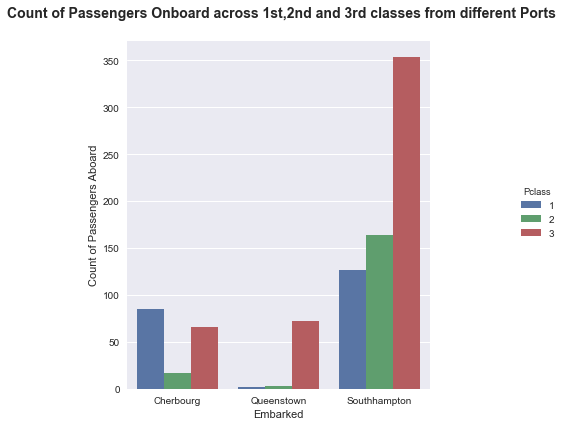

In [490]:
g = sns.factorplot('Embarked', order=['Cherbourg','Queenstown','Southhampton'], data=titanic_embarked_new, hue='Pclass', kind='count', hue_order=[1,2,3],size=6, aspect=.8)
g.set_ylabels("Count of Passengers Aboard")

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Count of Passengers Onboard across 1st,2nd and 3rd classes from different Ports',fontsize=14, fontweight='bold')

Clearly, we have more passengers who boarded the ship from Southhampton and majority of them were in the 3rd class.
There are very few, infact, 2 and 3 passengers from the 1st and the 2nd class from Queenstown.

Considering the population distribution, we can say that the 'ratio of 1st class passengers to other classes' in Cherbourg is more than the 'ratio of 1st class passengers to other classes' in the other two cities. 
We have already seen that the 1st class passengers had better survival chances on the whole population regardless of the port of Embarkment.
Now let us see if this influenced more passengers from Cherbourg to survive than from other two cities.

Here is the Survival data from each class across all the port of Embarkments.

In [491]:
print (Survival_embarked_new.groupby(['Embarked','Pclass']).size())#Survived passengers count

Embarked      Pclass
Cherbourg     1         59
              2          9
              3         25
Queenstown    1          1
              2          2
              3         27
Southhampton  1         74
              2         76
              3         67
dtype: int64


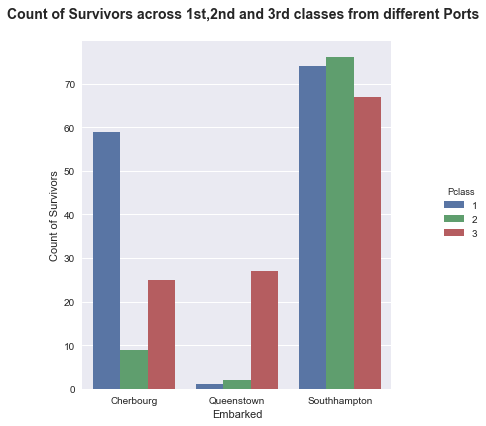

In [492]:
g = sns.factorplot('Embarked', order=['Cherbourg','Queenstown','Southhampton'], data=Survival_embarked_new, hue='Pclass', kind='count', hue_order=[1,2,3],size=6, aspect=.8)
g.set_ylabels("Count of Survivors")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Count of Survivors across 1st,2nd and 3rd classes from different Ports',fontsize=14, fontweight='bold')

Survived passengers from 1st class is comparatively more than other classes in Cherbourg. But in Southhampton, the split between 1st class and 2nd class survivors are nearly equal.

However, if we consider the ratio of survivors it will be clear that the survivors from 1st class were more,

Embarked      Pclass
Cherbourg     1         0.69
              2         0.53
              3         0.38
Queenstown    1          0.5
              2         0.67
              3         0.38
Southhampton  1         0.58
              2         0.46
              3         0.19
dtype: object


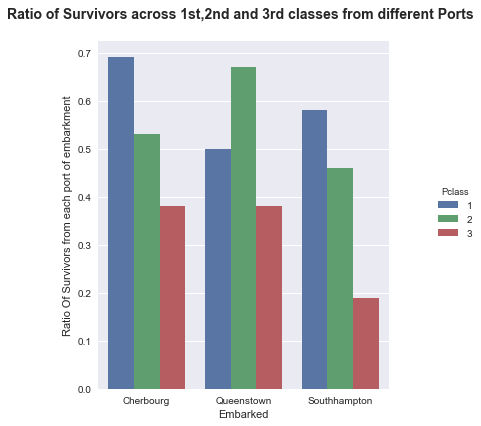

In [493]:
#Calculating the ratio of survivors in each class across each port of Embarkment
Total_Embarked = (titanic_embarked_new.groupby(['Embarked','Pclass']).size())
Survived_Embarked = (Survival_embarked_new.groupby(['Embarked','Pclass']).size())

Survival_ratio = (Survived_Embarked/Total_Embarked).apply(lambda x: str(round(x, 2)))

print (Survival_ratio)
Survival_ratio = Survival_ratio.reset_index()
Survival_ratio.columns = ['Embarked','Pclass','SERatio']
Survival_ratio = Survival_ratio.apply(pd.to_numeric, errors='ignore')
g= sns.factorplot('Embarked', 'SERatio',data=Survival_ratio, hue='Pclass',kind='bar',size=6, aspect=.8)
g.set_ylabels("Ratio Of Survivors from each port of embarkment")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Ratio of Survivors across 1st,2nd and 3rd classes from different Ports',fontsize=14, fontweight='bold')

Yes, it mattered that, there were more 1st class passengers who embarked from Cherbourg, for more people from this city to survive!!

At the same time, it is sad that many passengers from Southhampton in 3rd class could not get access to the life boats.

### Conclusion:

With the above calculations and Visualizations we can conclude on the following:

*  Women and Children had better survival chances compared to men in all the 'Passenger Classes'. 

*  The 1st class passengers fared a better chance of survival. 

*  There were more First class passengers from Cherbourg and more 3rd class passengers from Southhampton. There were hardly any first class and second class passengers from Queenstown making majority of the passengers boarding in 3rd class.
Also, if we compare the passengers on board versus the survived passengers count, it is clear that, although the number of passengers who boarded from Cherbourg were less than Southhampton, the survivors were more which indicates that the 1st class passengers used their infulence to get to the life boats as their were more people from 1st class who embarked from Cherbourg.


References:
-  https://matplotlib.org/index.html 
-  https://seaborn.pydata.org/
-  http://nbviewer.jupyter.org/github/Carreau/posts/blob/master/Blog1.ipynb
-  https://stackoverflow.com/
-  https://github.com/vivek2606/Udacity-Titanic-Data-Analysis/ (For using Median of 'Age' to fill the NaN data)

#### Scope for more Analysis:

-  Exploring the 'Title' or 'Ticket' variable to find the survival rate of the crew members to other passengers!!
-  We could check if women travelling with children or mothers/sisters/nannies had better chances to survive.
-  Explore the Fare distribution across age,sex and class
-  Figure out if travelling families or single passengers survived more
-  Exploring survival rates based on the cabin location

#### Limitations:

*  Assumptions are made with respect to the Age of a child and missing data for as many as 20% of the rows.
*  The health and ability of a person can also effect their chances of survival regardless of their age, sex, Pclass, Cabin etc.,
*  It is not always neccessary that the correlations contribute to the causation. In this dataset, for example, the cabin location matters in calculating the survival rates. However, there could be chances of passengers from other cabins to have mixed up.